In [33]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import tidetools

from salishsea_tools import (nc_tools,viz_tools)

import os
import glob
from matplotlib import animation

import datetime

%matplotlib inline

ImportError: cannot import name 'teos_tools'

In [2]:
start = datetime.datetime(2015,4,1)
#end = datetime.datetime(2015,8,26)

#numdays = (end-start).days
#dates = [start + datetime.timedelta(days=num)
#             for num in range(0, numdays+1)]



In [3]:
results_home = '/results/SalishSea/nowcast/'
bathy = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

In [4]:


def results_dataset(period, grid, results_dir):
    """Return the results dataset for period (e.g. 1h or 1d)
    and grid (e.g. grid_T, grid_U) from results_dir.
    """
    filename_pattern = 'SalishSea_{period}_*_{grid}.nc'
    filepaths = glob.glob(os.path.join(results_dir, filename_pattern.format(period=period, grid=grid)))
    return nc.Dataset(filepaths[0])



In [5]:
#lats and lons
lat = bathy.variables['nav_lat'][:,:]
lon = bathy.variables['nav_lon'][:,:]

date=start
results_dir = os.path.join(results_home, date.strftime('%d%b%y').lower())
period = '1d'
print(results_dir)

/results/SalishSea/nowcast/01apr15


In [21]:
grid_T = results_dataset(period,'grid_T',results_dir)

#load variables
S = grid_T.variables['vosaline'][0,0,:,:]

x=np.arange(0,lon.shape[1])
y=np.arange(0,lon.shape[0])

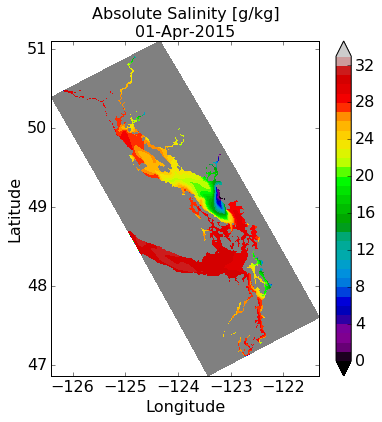

In [38]:
smin, smax, dels = 0, 34, 1
cs = np.arange(smin,smax)
cmap = plt.get_cmap('spectral')
st=5

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
t=0
#mesh

mesh=ax.contourf(lon,lat,S*35.16504/35.0,cs,cmap=cmap,extend='both')

#land
viz_tools.plot_land_mask(ax,bathy,coords='map',xslice=x,yslice=y,color='grey')

#title
timestamp = date
ax.set_title('Absolute Salinity [g/kg]\n'+timestamp.strftime('%d-%b-%Y'),size=16)
ax.set_xlabel('Longitude',size=16)
ax.set_ylabel('Latitude',size=16)

cbar = plt.colorbar(mesh, ax=ax)
cbar.ax.tick_params(labelsize=16) 
ax.tick_params(labelsize=16)

fig.savefig('/home/eolson/pyCode/notebooks/figs/Sal20150401.png')